In [97]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [98]:
df = pd.read_csv("Eagle_Ford_List.csv")
df.head()

,Date Time,Production
0,2010,4954696
1,2011,16520868
2,2012,16520868
3,2013,31220304
4,2014,48774547


In [99]:
df = df.set_index('Date Time')
#pd.infer_freq(index='Date Time', warn=True)
# df.index

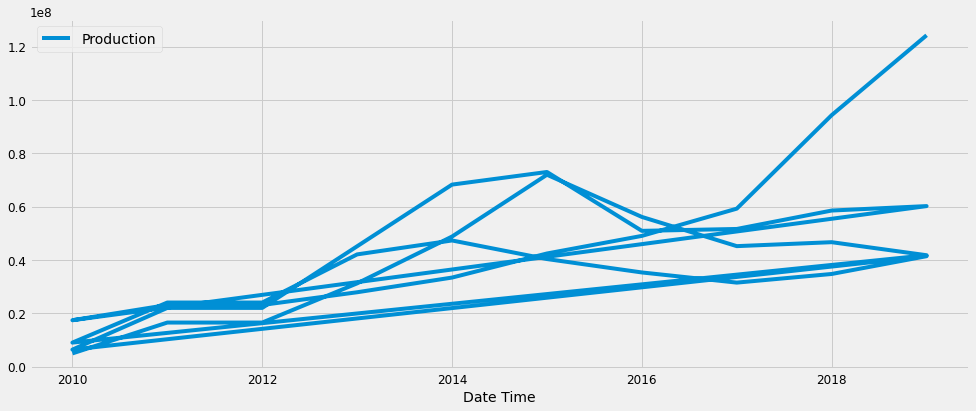

In [100]:
df.plot(figsize=(15, 6))
plt.show()

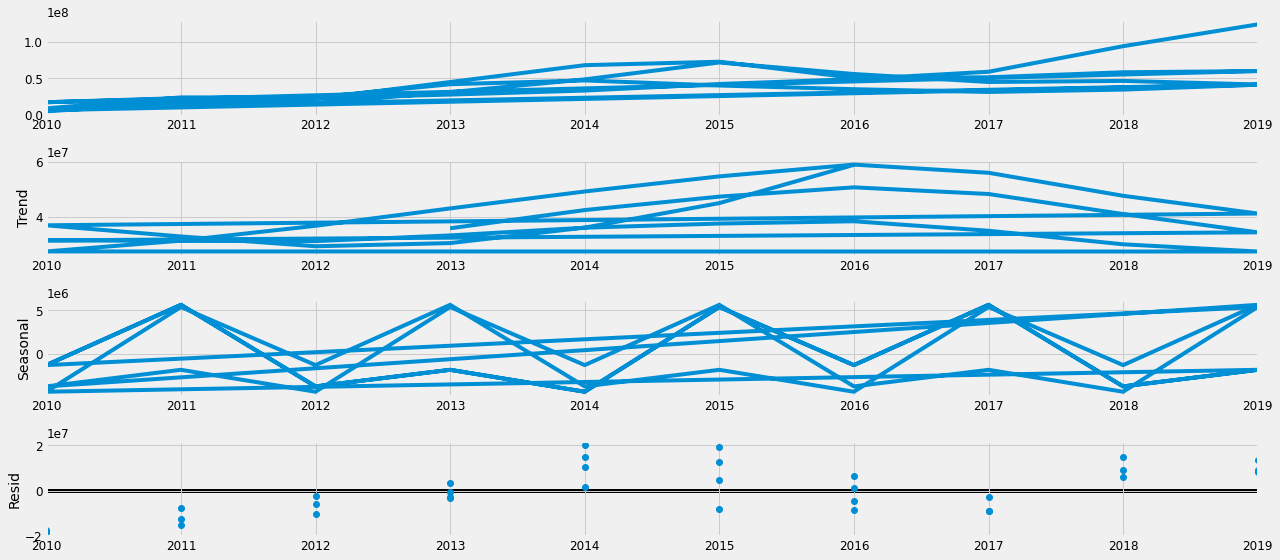

In [101]:
#time-series decomposition
#decompose our time series into three distinct components
#trend, seasonality, and noise

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df, model='additive', period=6)
fig = decomposition.plot()
plt.show()

In [102]:
# ARIMA, which stands for Autoregressive Integrated Moving Average.
# ARIMA models are denoted with the notation ARIMA(p, d, q)

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [103]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        
        except:
            continue

In [104]:
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0727      3.357      0.022      0.983      -6.507       6.652
ma.L1          0.1278      3.334      0.038      0.969      -6.408       6.663
ar.S.L12      -0.7981      0.373     -2.141      0.032      -1.529      -0.067
sigma2      6.001e+14   6.39e-16   9.39e+29      0.000       6e+14       6e+14


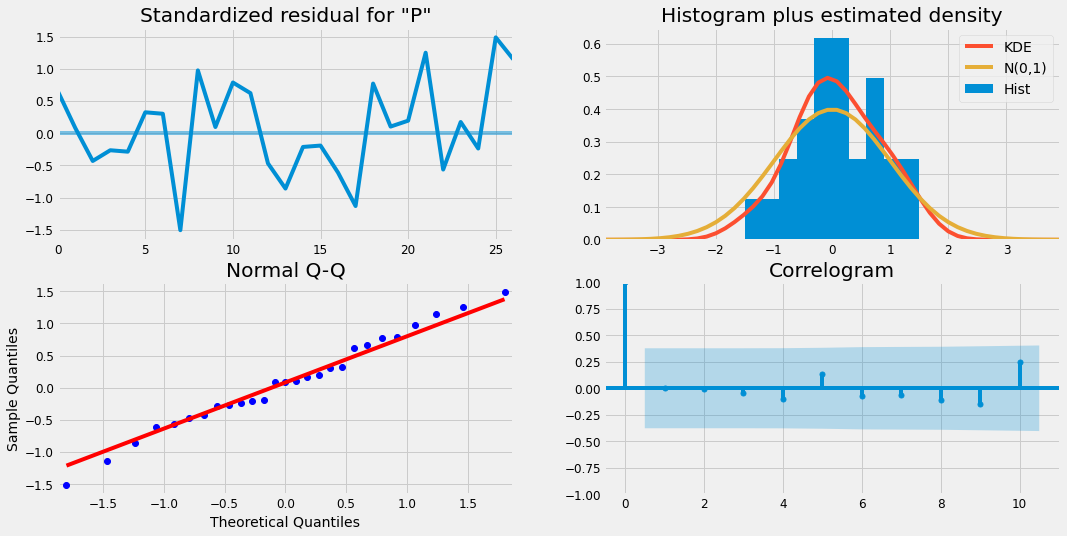

In [105]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

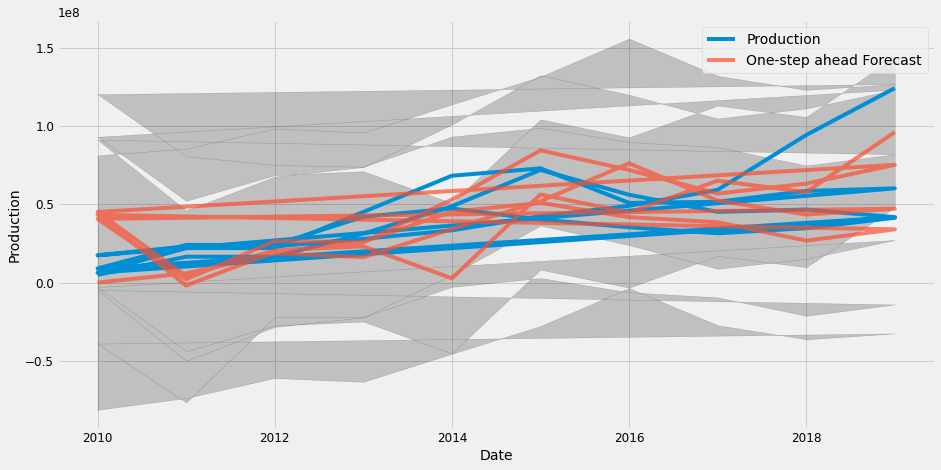

In [106]:
pred = results.get_prediction(dynamic=False)
pred_ci = pred.conf_int()
ax = df.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Production')
plt.legend()
plt.show()

In [107]:
y_forecasted = pred.predicted_mean
y_truth = df
# mse = ((y_forecasted - y_truth) ** 2).mean()
# print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [108]:
# print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

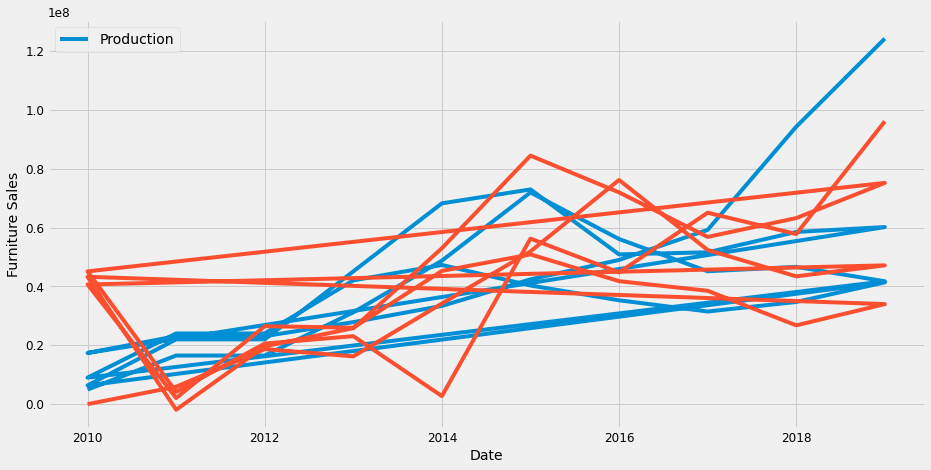

In [119]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()
ax = df.plot(label='observed', figsize=(14, 7))
ax.plot(y_forecasted)
#pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
#ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()


In [94]:
df.head()

,Production
Date Time,
2010,4954696
2011,16520868
2012,16520868
2013,31220304
2014,48774547


In [121]:
print(pred_uc.predicted_mean)

40    1.278057e+08
41    1.255505e+08
42    1.195270e+08
43    1.260081e+08
44    9.804729e+07
45    1.114924e+08
46    1.126048e+08
47    1.328716e+08
48    1.526645e+08
49    1.585043e+08
Name: predicted_mean, dtype: float64
